# Tools

In [31]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

# Dataset

In [32]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Pre-Processing

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [35]:
df.drop_duplicates(keep='first',inplace=True)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Basic EDA

<Axes: >

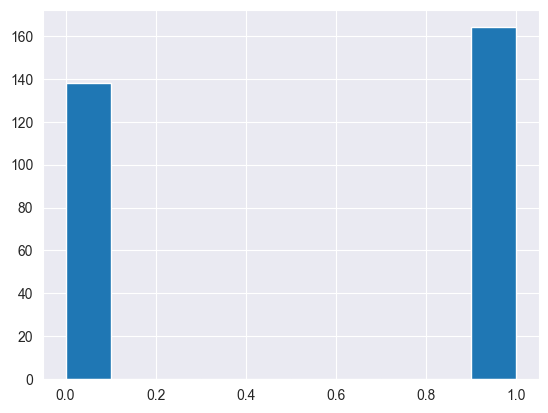

In [36]:
df["output"].hist()

<Axes: >

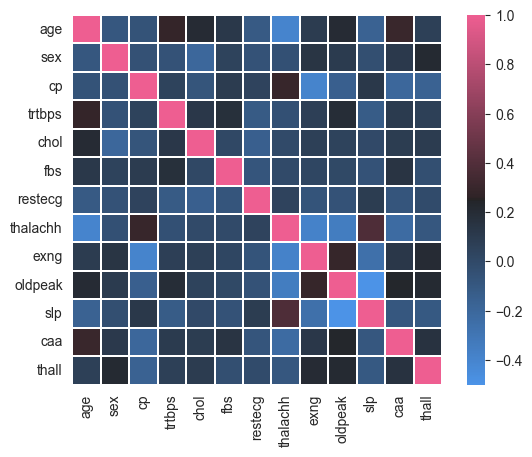

In [37]:
corr = df.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

# Data Analysis

sex
1    206
0     96
Name: count, dtype: int64


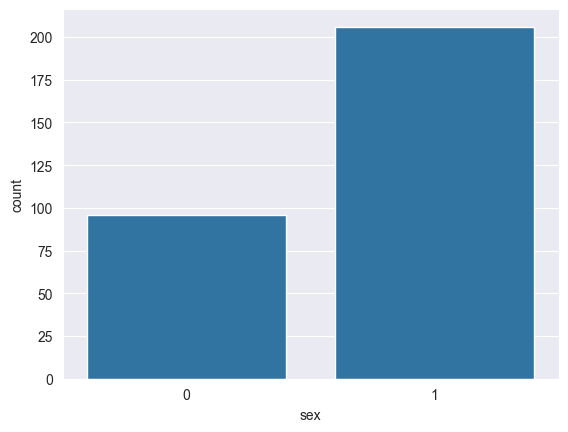

In [38]:
x=df.sex.value_counts()
print(x)
p=sns.countplot(data=df,x="sex")
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


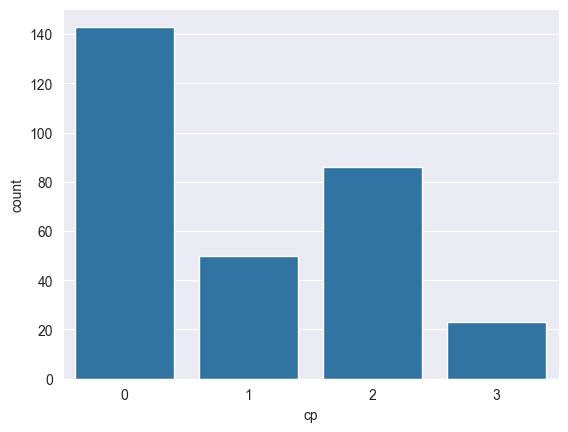

In [39]:
x=df.cp.value_counts()
print(x)
p=sns.countplot(data=df,x="cp")
plt.show()
# 0: typical angina
# 1: atypical angina
# 2: non-anginal pain
# 3: asymptomatic

<Figure size 1000x1000 with 0 Axes>

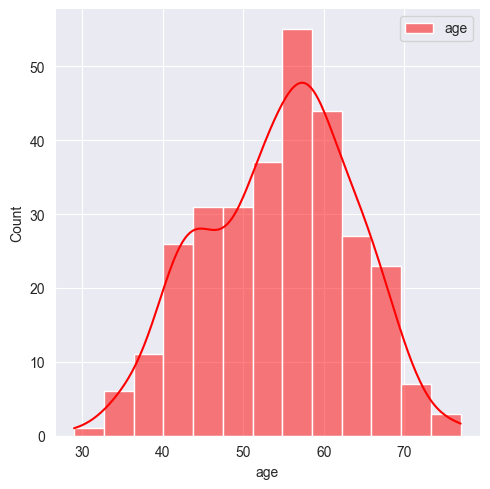

In [40]:
plt.figure(figsize=(10,10))
sns.displot(df.age,color='red',label="age",kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

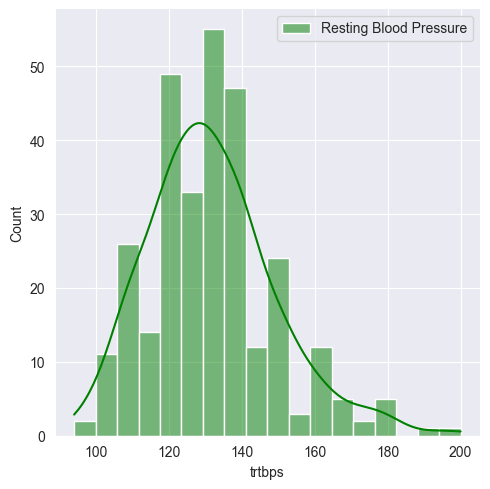

In [41]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps,color='green',label="Resting Blood Pressure",kde=True)
plt.legend()

<Figure size 1000x1000 with 0 Axes>

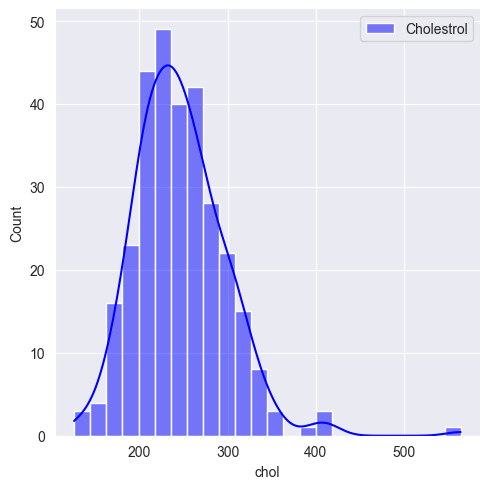

In [42]:
plt.figure(figsize=(10,10))
sns.displot(df.chol,color='blue',label="Cholestrol",kde=True)
plt.legend()

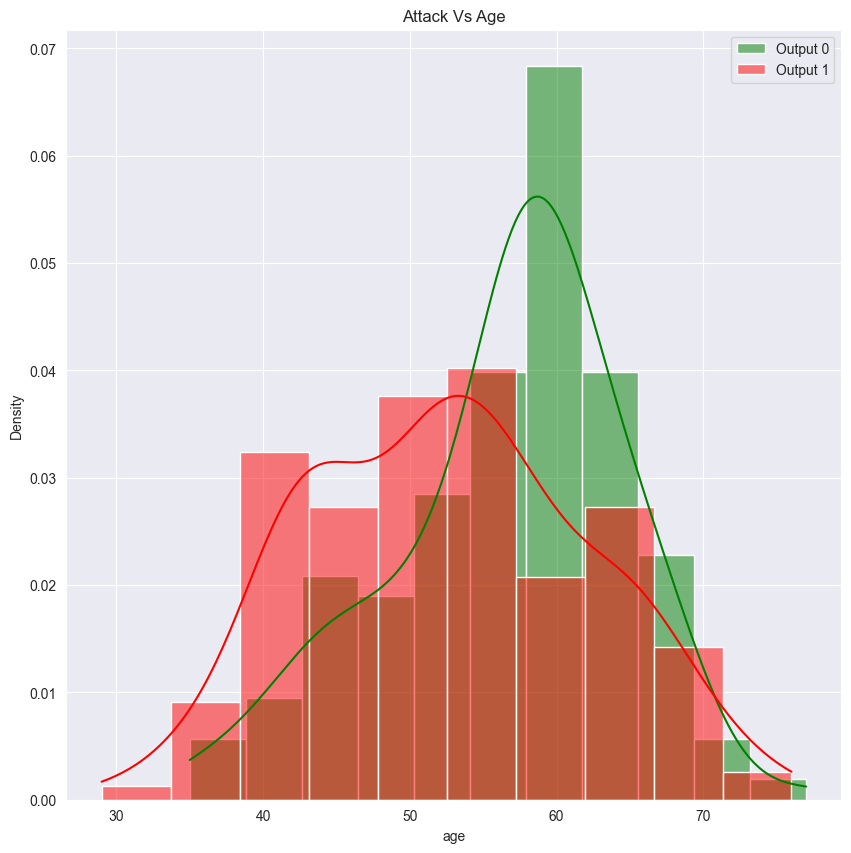

In [43]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output']==0]['age'], color='green', kde=True, label='Output 0', stat='density')
sns.histplot(df[df['output']==1]['age'], color='red', kde=True, label='Output 1', stat='density')
plt.title("Attack Vs Age")
plt.legend()
plt.show()

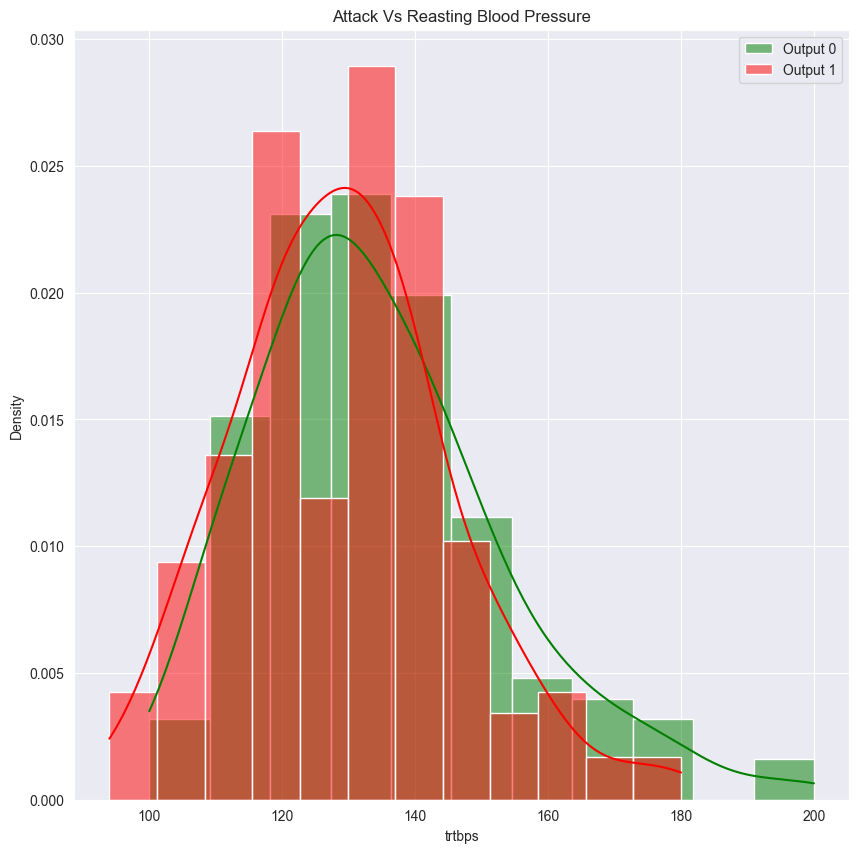

In [44]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output']==0]['trtbps'], color='green', kde=True, label='Output 0', stat='density')
sns.histplot(df[df['output']==1]['trtbps'], color='red', kde=True, label='Output 1', stat='density')
plt.title("Attack Vs Reasting Blood Pressure")
plt.legend()
plt.show()

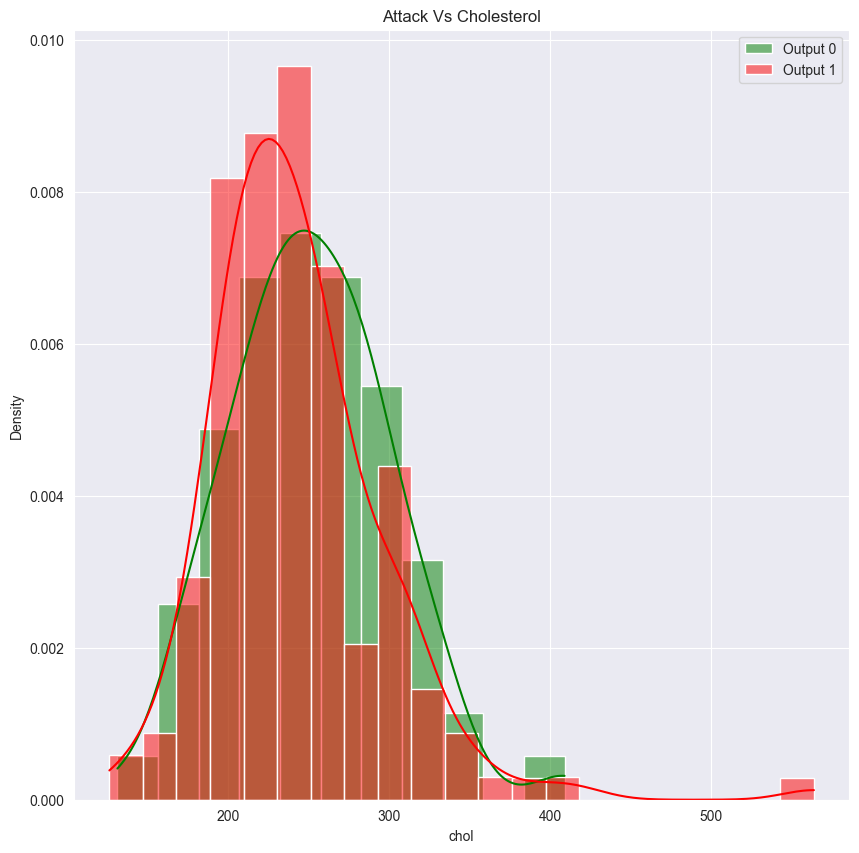

In [45]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output']==0]['chol'], color='green', kde=True, label='Output 0', stat='density')
sns.histplot(df[df['output']==1]['chol'], color='red', kde=True, label='Output 1', stat='density')
plt.title("Attack Vs Cholesterol")
plt.legend()
plt.show()

# Selection of inputs(x) and target(y)

In [46]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

# Splitting of data into train and test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# msk = np.random.rand(len(df)) < 0.8
# train = df[msk]
# test=df[~msk]
# test

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#  model

In [50]:
# class GaussNB:
    
#     def __init__(self):
#         """
#         No params are needed for basic functionality.
#         """
#         pass
    
#     def _mean(self,X): # CHECKED
#         """
#         Returns class probability for each 
#         """
#         mu = dict()
#         for i in self.classes_:
#             idx = np.argwhere(self.y == i).flatten()
#             mean = []
#             for j in range(self.n_feats):
#                 mean.append(np.mean( X[idx,j] ))
#             mu[i] = mean
#         return mu
    
#     def _stddev(self,X): # CHECKED
#         sigma = dict()
#         for i in self.classes_:
#             idx = np.argwhere(self.y==i).flatten()
#             stddev = []
#             for j in range(self.n_feats):
#                 stddev.append( np.std(X[idx,j]) )
#             sigma[i] = stddev
#         return sigma
    
#     def _prior(self): # CHECKED
#         """Prior probability, P(y) for each y
#         """
#         P = {}
#         for i in self.classes_:
#             count = np.argwhere(self.y==i).flatten().shape[0]
#             probability = count / self.y.shape[0]
#             P[i] = probability
#         return P
    
#     def _normal(self,x,mean,stddev): # CHECKED
#         """
#         Gaussian Normal Distribution
#         $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$
#         """
        
#         multiplier = (1/ float(np.sqrt(2 * np.pi * stddev**2))) 
#         exp = np.exp(-((x - mean)**2 / float(2 * stddev**2)))
#         return multiplier * exp

    
#     def P_E_H(self,x,h):
#         """
#         Uses Normal Distribution to get, P(E|H) = P(E1|H) * P(E2|H) .. * P(En|H)
        
#         params
#         ------
#         X: 1dim array. 
#             E in P(E|H)
#         H: class in y
#         """
#         pdfs = []
        
#         for i in range(self.n_feats):
#             mu = self.means_[h][i]
#             sigma = self.stddevs_[h][i]
#             pdfs.append( self._normal(x[i],mu,sigma) )
            
#         p_e_h = np.prod(pdfs)
#         return p_e_h
        
        
#     def fit(self, X, y):
#         self.n_samples, self.n_feats = X.shape
#         self.n_classes = np.unique(y).shape[0]
#         self.classes_ = np.unique(y)
#         self.y = y
        
#         self.means_ = self._mean(X) # dict of list {class:feats}
#         self.stddevs_ = self._stddev(X) # dict of list {class:feat}
#         self.priors_ = self._prior() # dict of priors 
        
#     def predict(self,X):
#         samples, feats = X.shape
#         if samples!=self.n_samples or feats!=self.n_feats:
#             raise DimensionError("No dimension match with training data!")
            
#         result = []
#         for i in range(samples):
#             distinct_likelyhoods = []
#             for h in self.classes_:
#                 tmp = self.P_E_H(X[i],h)
#                 distinct_likelyhoods.append( tmp * self.priors_[h])
#             marginal = np.sum(distinct_likelyhoods)
#             tmp = 0
#             probas = []
#             for h in self.classes_:
#                 numerator = self.priors_[h] * distinct_likelyhoods[tmp]
#                 denominator = marginal
#                 probas.append( numerator / denominator )
#                 tmp+=1
#             # predicting maximum
#             idx = np.argmax(probas)
#             result.append(self.classes_[idx])
#         return result

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)


GaussianNB()

In [52]:
joblib.dump(gnb, "gaussian_naive_bayes_heart.pkl")

['gaussian_naive_bayes_heart.pkl']

In [53]:
model = joblib.load("gaussian_naive_bayes_heart.pkl")

In [54]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Predict the target

In [55]:
y_pred=gnb.predict(X_test)

In [56]:
y_test[:20]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

In [57]:
y_pred[:20]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0],
      dtype=int64)

# Result

Precision: 0.8888888888888888
Recall: 0.8163265306122449
Accuracy: 0.8461538461538461
F1 Score: 0.851063829787234


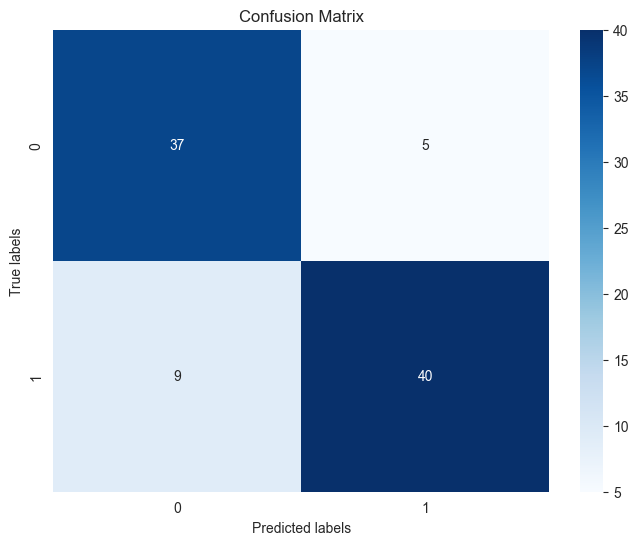

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision Score
precision = precision_score(y_test, y_pred)

# Recall Score
recall = recall_score(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Printing Precision, Recall, Accuracy, and F1 Score
print("Precision:", precision)#
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [59]:
# df.head()

In [60]:


# def predict_heart_disease(age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall):
#     sex_val = 0 if sex == "Male" else 1
#     cp_val = 0 if cp == "Typical Angina" else 1 if cp == "Atypical Angina" else 2 if cp == "Non-Anginal Pain" else 3
#     # fbs_val = 1 if fbs == "True" else 0
#     restecg_val = 0 if restecg == "Normal" else 1 if restecg == "ST-T Wave Abnormality" else 2
#     exng_val = 1 if exng == "Yes" else 0
#     slp_val = 0 if slp == "Upsloping" else 1 if slp == "Flat" else 2
#     thall_val = 0 if thall == "Normal" else 1 if thall == "Fixed Defect" else 2
#     features = np.array([age, sex_val, cp_val, trtbps, chol, fbs_val, restecg_val, thalachh, exng_val, oldpeak, slp_val, caa, thall_val]).reshape(1, -1)
#     prediction = model.predict(features)[0]
#     probability = model.predict_proba(features)[0][1]  # Probability of class 1 (True/Positive)
#     return {"prediction": prediction, "probability": probability}
    
# # Interface
# input_components = [
#     gr.components.Number(label="Age"),
#     gr.components.Dropdown(label="Sex", choices=["Male", "Female"]),
#     gr.components.Dropdown(label="Chest Pain Type", choices=["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"]),
#     gr.components.Number(label="Resting Blood Pressure (mm Hg)"),
#     gr.components.Number(label="Cholesterol (mg/dl)"),
#     gr.components.Dropdown(label="Fasting Blood Sugar > 120 mg/dl", choices=["False", "True"]),
#     gr.components.Dropdown(label="Resting Electrocardiographic Results", choices=["Normal", "ST-T Wave Abnormality", "Left Ventricular Hypertrophy"]),
#     gr.components.Number(label="Maximum Heart Rate Achieved"),
#     gr.components.Dropdown(label="Exercise Induced Angina", choices=["No", "Yes"]),
#     gr.components.Number(label="ST Depression Induced by Exercise Relative to Rest"),
#     gr.components.Dropdown(label="Slope of the Peak Exercise ST Segment", choices=["Upsloping", "Flat", "Downsloping"]),
#     gr.components.Number(label="Number of Major Vessels Colored by Flourosopy"),
#     gr.components.Dropdown(label="Thalassemia", choices=["Normal", "Fixed Defect", "Reversible Defect"]),
# ]

# output_components = [gr.components.Label(label="Predicted Heart Disease"), gr.components.Number(label="Probability")]

# iface = gr.Interface(
#     fn=predict_heart_disease,
#     inputs=input_components,
#     outputs=output_components,
#     title="Heart Disease Prediction",
#     description="Predict the likelihood of heart disease based on various factors."
# )

# iface.launch()